In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the standard libraries to visualize data set
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv


In [2]:
# Load the three Michelin Stars dataset into a pandas dataframe

one_star = pd.read_csv('/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv')
two_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv')
three_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv')


In [3]:
# Display the first 5 rows of one dataset

one_star.head(5)


,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...


In [4]:
# Info on each dataset

one_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       549 non-null    object 
 1   year       549 non-null    int64  
 2   latitude   549 non-null    float64
 3   longitude  549 non-null    float64
 4   city       547 non-null    object 
 5   region     549 non-null    object 
 6   zipCode    400 non-null    object 
 7   cuisine    549 non-null    object 
 8   price      398 non-null    object 
 9   url        549 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 43.0+ KB


In [5]:
two_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       110 non-null    object 
 1   year       110 non-null    int64  
 2   latitude   110 non-null    float64
 3   longitude  110 non-null    float64
 4   city       110 non-null    object 
 5   region     110 non-null    object 
 6   zipCode    77 non-null     object 
 7   cuisine    110 non-null    object 
 8   price      90 non-null     object 
 9   url        110 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.7+ KB


In [6]:
three_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       36 non-null     object 
 1   year       36 non-null     int64  
 2   latitude   36 non-null     float64
 3   longitude  36 non-null     float64
 4   city       36 non-null     object 
 5   region     36 non-null     object 
 6   zipCode    24 non-null     object 
 7   cuisine    36 non-null     object 
 8   price      31 non-null     object 
 9   url        36 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ KB


# **Data Cleaning and Preprocessing**

In [7]:
# Add a new Michelin stars Classification Column

one_star['Michelin stars'] = 1
two_stars['Michelin stars'] = 2
three_stars['Michelin stars'] = 3

# Join the three tables for an easier data analysis

michelin_stars = pd.concat([one_star,two_stars,three_stars],axis=0)
michelin_stars

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin stars
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
...,...,...,...,...,...,...,...,...,...,...,...
31,Fat Duck,2019,51.508280,-0.702320,Bray,United Kingdom,SL6 2AQ,Creative,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
32,Waterside Inn,2019,51.507730,-0.701210,Bray,United Kingdom,SL6 2AT,Classic French,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
33,Alain Ducasse at The Dorchester,2019,51.507120,-0.152520,Mayfair,United Kingdom,W1K 1QA,French,NaN,https://guide.michelin.com/gb/en/greater-londo...,3
34,The Araki,2019,51.511826,-0.140389,Mayfair,United Kingdom,W1S 3BF,Japanese,NaN,https://guide.michelin.com/gb/en/greater-londo...,3


In [8]:
michelin_stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 35
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            695 non-null    object 
 1   year            695 non-null    int64  
 2   latitude        695 non-null    float64
 3   longitude       695 non-null    float64
 4   city            693 non-null    object 
 5   region          695 non-null    object 
 6   zipCode         501 non-null    object 
 7   cuisine         695 non-null    object 
 8   price           519 non-null    object 
 9   url             695 non-null    object 
 10  Michelin stars  695 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 65.2+ KB


In [9]:
#Drop columns

#Some columns were omitted, such as ‘url’ and ’zipCode’ because of their low relevance for this analysis

michelin_stars = michelin_stars.drop(columns=['url','zipCode'])

In [10]:
#Duplicates

duplicates_stars = michelin_stars[michelin_stars.duplicated()].copy()
duplicates_stars

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars


In [11]:
#Missing values

michelin_stars.isna().sum()

name                0
year                0
latitude            0
longitude           0
city                2
region              0
cuisine             0
price             176
Michelin stars      0
dtype: int64

In [12]:
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' nan]


In [13]:
#Handling missing values (NaN values) on the 'price' column
 
michelin_stars['price'].fillna('', inplace=True)
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' '']


/tmp/ipykernel_18/3430188342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  michelin_stars['price'].fillna('', inplace=True)


In [14]:
# Locate missing values in the 'city' column
missing_values = michelin_stars[michelin_stars['city'].isna()]

# Display the rows with missing values
print(missing_values)

      name  year   latitude   longitude city     region     cuisine price  \
152  Épure  2019  22.295830  114.169304  NaN  Hong Kong      French   $$$   
166  Arbor  2019  22.283146  114.155420  NaN  Hong Kong  Innovative   $$$   

     Michelin stars  
152               1  
166               1  


In [15]:
#Handling missing values (NaN values) on the 'city' column  

michelin_stars['city'].fillna('', inplace=True)
missing_values = michelin_stars[michelin_stars['city'].isna()]
print(missing_values)

Empty DataFrame
Columns: [name, year, latitude, longitude, city, region, cuisine, price, Michelin stars]
Index: []


/tmp/ipykernel_18/1127807254.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  michelin_stars['city'].fillna('', inplace=True)


In [16]:
#Confirming there is no missing values
michelin_stars.isna().sum()

name              0
year              0
latitude          0
longitude         0
city              0
region            0
cuisine           0
price             0
Michelin stars    0
dtype: int64

# **Summary Statistics**

In [17]:
#Statistics
michelin_stars.describe(include='all',)

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars
count,695,695.000000,695.000000,695.000000,695,695,695,695,695.000000
unique,684,NaN,NaN,NaN,180,24,70,6,NaN
top,L'Atelier de Joël Robuchon,NaN,NaN,NaN,New York,United Kingdom,Modern cuisine,$$$$,NaN
freq,3,NaN,NaN,NaN,74,162,108,197,NaN
mean,NaN,2018.943885,37.260124,4.417000,NaN,NaN,NaN,NaN,1.261871
std,NaN,0.230310,18.025875,81.095189,NaN,NaN,NaN,NaN,0.545270
min,NaN,2018.000000,-23.634005,-123.719444,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2019.000000,25.040718,-73.982920,NaN,NaN,NaN,NaN,1.000000
50%,NaN,2019.000000,40.727130,-0.149570,NaN,NaN,NaN,NaN,1.000000
75%,NaN,2019.000000,51.508962,100.578855,NaN,NaN,NaN,NaN,1.000000


# **Data Visualization**

In [18]:
#function def, categorize into 5 different groups(Inexpensive, Moderate, Expensive, Very Expensive, Luxury)

def price_group(price_symbol):
    return ('Inexpensive' if price_symbol == '$' 
            else 'Moderate' if price_symbol == '$$' 
            else 'Expensive' if price_symbol == '$$$' 
            else 'Very Expensive' if price_symbol == '$$$$' 
            else 'Luxury' if price_symbol == '$$$$$' 
            else 'Unknown')

michelin_stars['price_group'] = michelin_stars['price'].apply(price_group)

price_group_counts = michelin_stars['price_group'].value_counts()

print(price_group_counts)

price_group
Very Expensive    197
Unknown           176
Expensive         143
Moderate           75
Luxury             73
Inexpensive        31
Name: count, dtype: int64


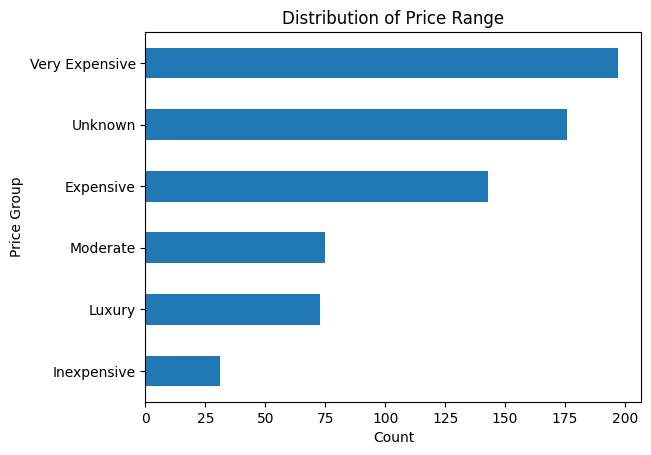

In [19]:
# Plot a horizontal bar chart for a better reading

price_group_counts.sort_values().plot.barh()
plt.title('Distribution of Price Range')
plt.xlabel('Count')
plt.ylabel('Price Group')
plt.show()

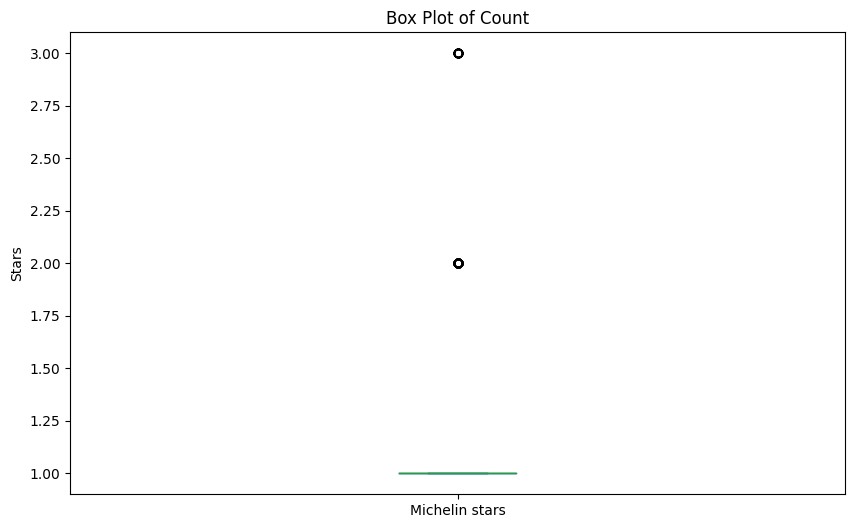

In [20]:
michelin_stars['Michelin stars'].plot(kind='box', figsize=(10, 6))
plt.ylabel('Stars')
plt.title('Box Plot of Count')
plt.show()

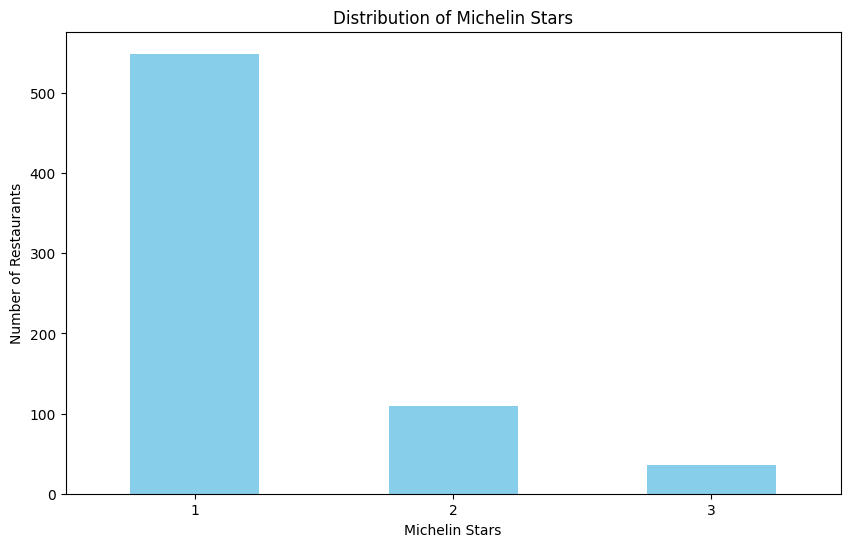

In [21]:
star_counts = michelin_stars['Michelin stars'].value_counts()

# Plot the bar chart
star_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Michelin Stars')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Michelin Stars')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

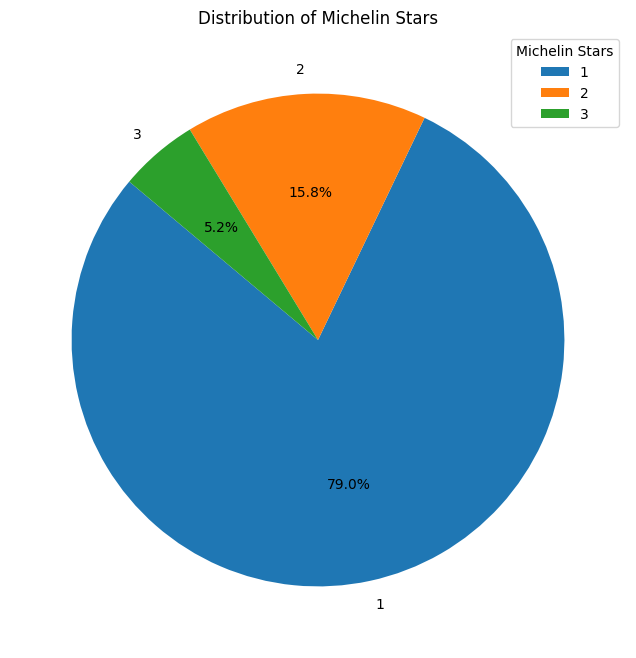

In [22]:
#michelin_stars['Michelin stars'].value_counts().plot(kind='pie');

star_counts = michelin_stars['Michelin stars'].value_counts()

# Plot the pie chart
ax = star_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Michelin Stars')
plt.legend(title='Michelin Stars', loc='upper right')
plt.show()

In [23]:
michelin_stars.value_counts('region')

region
United Kingdom    162
California         90
New York City      74
Hong Kong          63
Singapore          39
Denmark            28
Thailand           26
South Korea        26
Taipei             24
Chicago            22
Sweden             22
Austria            19
Macau              19
Washington DC      16
Ireland            14
Sao Paulo          12
Norway              8
Rio de Janeiro      6
Hungary             6
Finland             6
Croatia             5
Greece              4
Poland              2
Czech Republic      2
Name: count, dtype: int64

In [24]:
michelin_stars.value_counts('cuisine').head(20)

cuisine
Modern cuisine           108
Contemporary              75
Japanese                  54
Creative                  46
Cantonese                 40
Modern British            38
French                    29
Innovative                28
Italian                   21
French contemporary       19
Sushi                     17
Chinese                   15
Classic cuisine           15
Californian               14
Korean                    13
Thai                      13
Indian                    12
Seafood                   12
American                  10
European contemporary      7
Name: count, dtype: int64